In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from word2number import w2n
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
from numpy import random

In [63]:
data=pd.read_csv("D:/PYTHON/MachineLearning/DataSets/salary_predict_dataset.csv")
data['experience_null']=np.where(data['Salary']<=20000,'one',np.where(data['Salary']>=40000,'three','two'))
data.experience=data.experience.fillna(data.experience_null)
data['experience']=data['experience'].apply(w2n.word_to_num)



imputer  = SimpleImputer(missing_values=np.nan, strategy='mean')
ss=data[['test_score']].values.reshape(-1,1)
data['test_score']=imputer .fit(ss)
data['test_score'] = imputer.transform(ss)


imputer1=SimpleImputer(missing_values=np.nan,strategy='median')
ss1=data['interview_score'].values.reshape(-1,1)
data['interview_score']=imputer1.fit(ss1)
data['interview_score']=imputer1.transform(ss1)
data.drop(columns=['experience_null'],inplace=True)


print(data.isnull().sum()) 
print(data)


experience         0
test_score         0
interview_score    0
Salary             0
dtype: int64
    experience  test_score  interview_score  Salary
0            3    8.000000              8.0   50000
1            2    5.000000              4.0   22000
2            3    6.000000              5.0   30000
3            5    9.000000              9.0   55000
4            6    3.000000              5.0   13000
5            1    2.000000              1.0    9000
6           10    8.000000              6.0   48000
7            1    1.000000              2.0     500
8           15    9.000000              9.0   60000
9           13    7.500000              7.5   45000
10          10    5.441176              5.0   25000
11           1    1.000000              1.0     500
12           1    3.000000              6.0   25000
13           4    5.000000              4.0   36000
14           6    5.000000              6.0    8000
15          11    9.000000              8.0   55000
16          12    9

In [71]:
X=np.array(data[['experience','test_score','interview_score']])
y=np.array((data.Salary))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [72]:
print('Variance score: for training dataset {}'.format(reg.score(x_train, y_train))) 
print('Variance score: for test dataset {}'.format(reg.score(x_test, y_test))) 

Variance score: for training dataset 0.914354742821954
Variance score: for test dataset 0.8083865308056181


In [74]:
data['Predicted_salary']=pd.DataFrame(reg.predict(X))

In [67]:
print(data)

    experience  test_score  interview_score  Salary  Predicted_salary
0            3    8.000000              8.0   50000      53650.609624
1            2    5.000000              4.0   22000      29945.955526
2            3    6.000000              5.0   30000      37140.266834
3            5    9.000000              9.0   55000      60360.606366
4            6    3.000000              5.0   13000      16110.718638
5            1    2.000000              1.0    9000       7394.392470
6           10    8.000000              6.0   48000      47954.225576
7            1    1.000000              2.0     500       2021.948680
8           15    9.000000              9.0   60000      55517.460703
9           13    7.500000              7.5   45000      44968.151024
10          10    5.441176              5.0   25000      30103.442464
11           1    1.000000              1.0     500        868.857638
12           1    3.000000              6.0   25000      19685.382511
13           4    5.

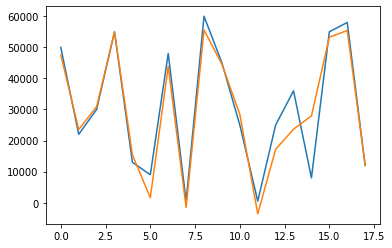

In [76]:
plt.plot(data.Salary)
plt.plot(data.Predicted_salary)